# Data Science Job Markey EDA and Text Analysis
*By: <a href = 'https://www.linkedin/in/olisa-oluwatunbi/'>Olisa Oluwatunbi</a>*

## Introduction

### Introduction

Data science has become a pivotal field, driving innovation and data-driven decision-making across industries. With the growing recognition of its value, the demand for skilled data scientists has surged, creating a dynamic job market. This project, titled "Data Science Job Market Exploratory Data Analysis (EDA)," aims to examine the current landscape of data science employment comprehensively.

Using a dataset i found on <a href = 'https://www.kaggle.com/s16149/data-scientist-job-market-in-the-us'>Kaggle</a> uploaded by 
Shashan. This analysis will uncover trends and patterns within the job market. The primary objectives are to identify which countries are actively employing data scientists and to determine the essential skills listed in job descriptions. Additionally, this analysis will explore job distribution by region, salary trends, and the impact of experience and education on job prospects. The project will also examine the prevalence of remote work opportunities in data science, especially relevant given the rise of remote and hybrid work models.

This EDA will provide aspiring data scientists, professionals, and educational institutions with valuable insights to navigate the competitive job market. By illuminating the dynamics of the data science job market, this project aims to enhance understanding and inform strategies for success in this evolving field.

*Table of contents*

* <a href = '#Introduction'>Introduction</a>

* <a href = '#DataPreparation'>Data Preparation</a>
    - <a href = '#datacleaning'>Data Cleaning</a>
    - <a href = '#newcolumn'>Populate New Columns</a>
    <br/><br/>
* <a href = '#eda'>Exploratory Data Analysis</a>
    - <a href = '#title'>Positions by Title </a>
    - <a href = '#company'>Position by Company</a>
    - <a href = '#city'>Position by Cities</a>
    - <a href = '#state'>Position by State</a>
    - <a href = '#statetitle'>Position by State and Job Title</a>
    <br/><br/>
* <a href = '#textanalysis'>Text Analysis</a>
    - <a href = '#textclean'>Text Cleaning and Preparation</a>
    - <a href = '#wordcloud'>Visulization</a>
        - <a href = '#wordcloud'>Wordcloud</a>
        - <a href = '#experience'>Years of Experience</a>
        - <a href = '#skill'>Skill Requirement</a>
        - <a href = '#degree'>Degree Requirement</a>
    <br/><br/>
* <a href = '#conclusion'>Conclusion</a>

In [30]:
import pandas as pd
import re
import string 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np

## Data Preparation<a id='DataPreparation'></a>

This dataset contains 6953 rows and 5 columns.

In [31]:
# Loading and view data 
df = pd.read_csv(r"C:\Users\Emmanuel\Documents\alldata.csv")
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


### Data Cleaning <a id='datacleaning'></a>

To clean the data, I started by checking the number of NaNs in each column. I found that the Review column had the most NaNs. Since I won't be analyzing the Review column, I decided to drop it entirely. For the remaining NaNs, I filtered the data frame to exclude all rows containing null values.

In [32]:
# Check if there are any NaNs in the data

df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [33]:
# Drop Review column from the data

df.drop(columns = 'reviews', inplace = True)

In [34]:
# 

In [35]:
# Filtered the data set to remove the rest od the rows containing NaNs values

df.drop(index = df[df['position'].isnull()].index, inplace = True)
df.isnull().any()

position       False
company        False
description    False
location       False
dtype: bool

### Populate New Columns <a id='newcolumn'></a>

To aggregate the data, I created separate city and state columns from the location column in the original dataset.

In [36]:
# Create city and state columns to better aggregate the data

# Splitting location column into city and state
df['city'] = df['location'].str.split(',').str[0].str.strip()
df['state'] = df['location'].str.split(',').str[1].str.strip()

# Combining city and state back into location
df['location'] = df['city'] + ',' + df['state']

# Displaying the modified DataFrame
df.head()


,position,company,description,location,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta,GA 30301",Atlanta,GA 30301
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta,GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta,GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta,GA 30303",Atlanta,GA 30303
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta,GA",Atlanta,GA


## Exporatory Data Analysis<a id='eda'></a>

In this segment, I'll address the following inquiries using **pandas** and **matplotlib**:

- What is the common job that emerges in 'Data Science' searches?
- Which company recruits the highest number of data science positions?
- Based on the data, which cities and states exhibit the most hiring activity?

### Position by Job Title <a id='title'> </a>

Given the diversity of job titles across companies, the following code snippet will classify the titles into five categories: Data Scientist, Machine Learning Engineer, Data Analyst, Data Science Manager, and "Others".

In [37]:
# Grouped position by name into 5 types
data = df.copy()
data['position']=[x.upper() for x in data['position']]
data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains("ENGINEER"), 'position'] = 'Machine Learning Engineer'
data.loc[data.position.str.contains("PRINCIPAL STATISTICAL PROGRAMMER"), 'position'] = 'Machine Learning Engineer'
data.loc[data.position.str.contains("PROGRAMMER"), 'position'] = 'Machine Learning Engineer'
data.loc[data.position.str.contains("DEVELOPER"), 'position'] = 'Machine Learning Engineer'

data.loc[data.position.str.contains("ANALYST"), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains("STATISTICIAN"), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains("MANAGER"), 'position'] = 'Data Science Manager'
data.loc[data.position.str.contains("CONSULTANT"), 'position'] = 'Data Science Manager'
data.loc[data.position.str.contains("DATA SCIENCE"), 'position'] = 'Data Science Manager'
data.loc[data.position.str.contains("DIRECTOR"), 'position'] = 'Data Science Manager'

# Categorize remaining positions as "Others"
data.loc[~data['position'].isin(['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Science Manager']), 'position'] = 'Others'



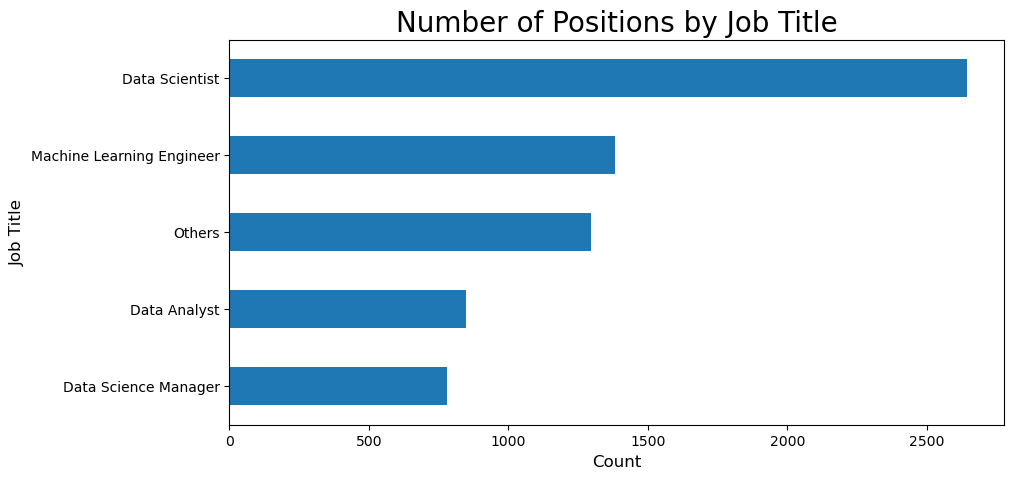

In [38]:
# Group by 'position' and count occurrences, then sort by 'company'
title = data.groupby(['position']).count().sort_values('company', ascending=True)

# Plot the bar plot
title['company'].plot(kind='barh', figsize=(10, 5))
plt.xlabel('Count', size=12)
plt.ylabel('Job Title', size=12)
plt.yticks(size=10)
plt.xticks(size=10)
plt.title('Number of Positions by Job Title', size=20)
plt.show()

### Position by Company <a id='company'></a>

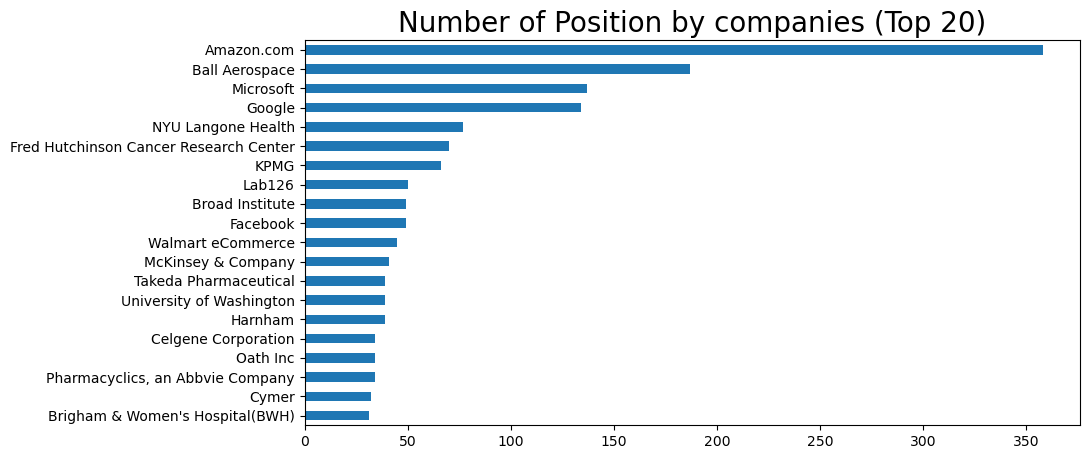

In [39]:
company = df.groupby(['company']).count().sort_values('position').tail(20)

company['position'].plot (kind='barh', figsize = (10,5))
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Position by companies (Top 20)', size=20)
plt.show()

According to the chart, it's evident that Amazon.com recruits the highest number of candidates, trailed by aerospace, Microsoft, and Google.

### Position by Cities <a id='city'></a>

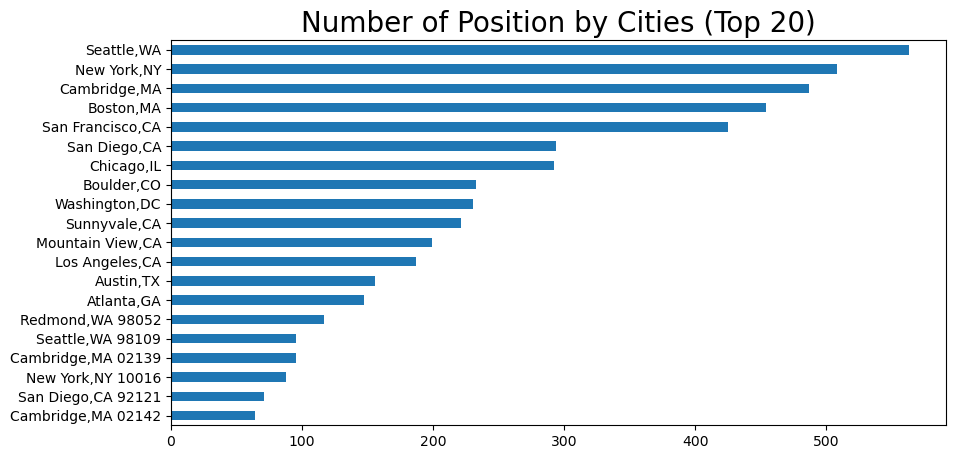

In [40]:
city = df.groupby(['location']).count().sort_values('position').tail(20)

city['position'].plot (kind='barh', figsize = (10,5))
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Position by Cities (Top 20)', size=20)
plt.show()

It seems that the primary cities hiring the most data science-related jobs are New York, Seattle, Cambridge, Boston, and San Francisco. This observation is logical since these cities serve as the technological hubs of the country.

### Position by States <a id='state'></a>

Despite New York having the highest number of positions, California holds the top spot, followed by Massachusetts and Washington.

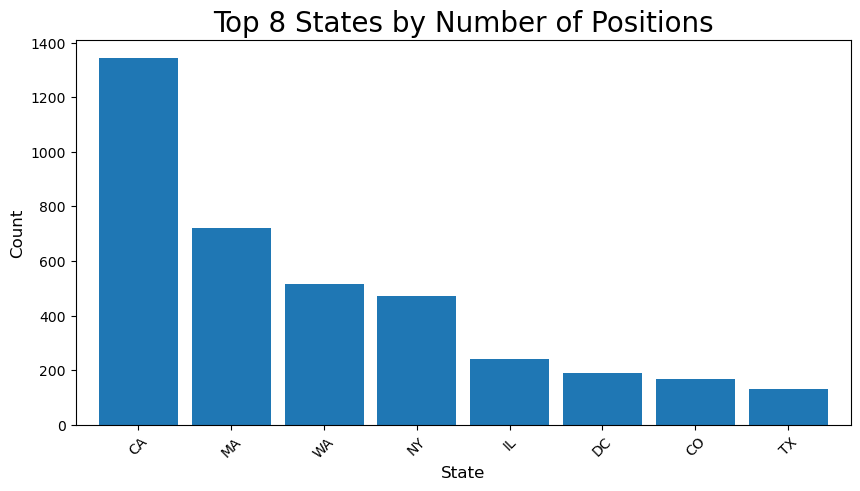

In [41]:
# Filter out rows where position is not categorized as "Others"
filtered_data = data[data['position'] != 'Others']

# Group by state and count the positions
state = filtered_data.groupby('state').count().sort_values('position', ascending=False)

# Slice to include only the top 8 states
top_8_states = state.head(8)

# Plot the data
top_8_states['position'].plot(kind='bar', figsize=(10, 5), width=0.85)
plt.xlabel('State', size=12)
plt.ylabel('Count', size=12)
plt.title('Top 8 States by Number of Positions', size=20)
plt.xticks(rotation=45)  # Adjust rotation for better readability
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()



### Position by States ans Job Title <a id='statetitle'></a>

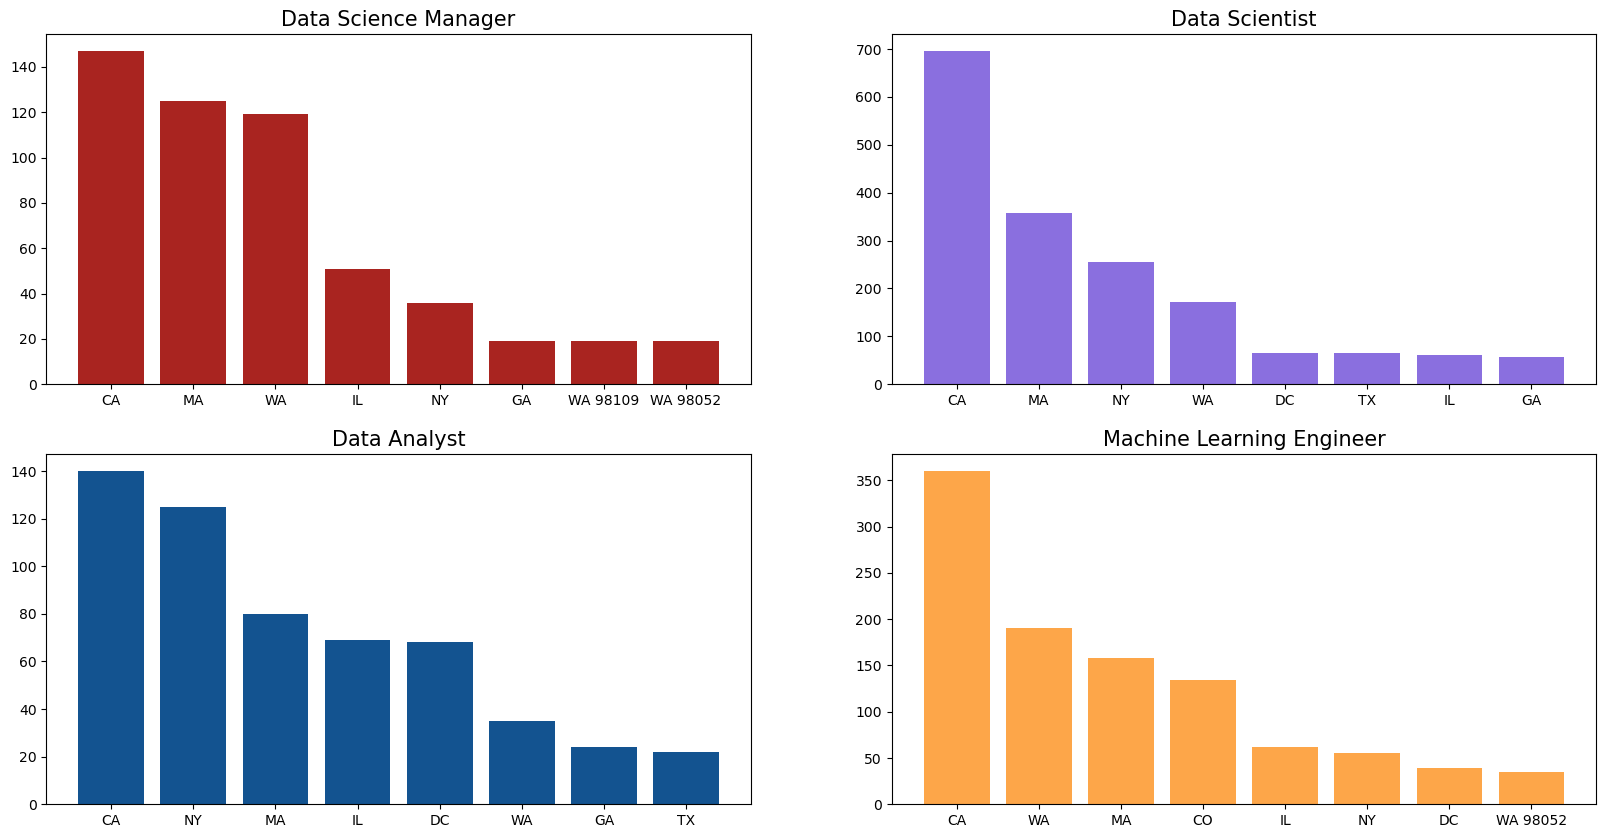

In [42]:
# Filter out rows where position is not categorized as "Others"
filtered_data = data[data['position'] != 'Others']

i = 1
color = ['#A92420', '#8A6FDF', '#135390', '#FDA649']
fig = plt.figure(figsize=(20, 10))
for position in filtered_data.position.unique():
    x = filtered_data[filtered_data['position'] == str(position)].groupby(['state']).count().sort_values('company', ascending=False).head(8)
    plt.subplot(2, 2, i)
    i += 1
    plt.bar(x.index, x['company'], color=color[i - 2])
    plt.xlabel('')
    plt.xticks(size=10)
    plt.title(str(position), size=15)
plt.show()


- For Data Science Managers, Data Scientists, and Machine Learning Engineers, California has the highest number of hire
- For Data Analysts, New York leads in hiring, followed closely by California.

## Text Analysis <a id='textanalysis'></a>

In this section, I will focus on the job description column of the data. By using libraries such as **wordcloud, and matplotlib**, I aim to gain further insights into the requirements for the field of data science. Specifically, I will try to answer the following questions:
- What are companies looking for when hiring?
- How many years of experience do they require?
- What level of education do companies prefer?

In [43]:
# Example of a description values
df.description.values[0][0:int(len(df.description.values[0])/2)]

"Development Director\nALS Therapy Development Institute has an immediate opening for Development Directors. Reporting directly to the Senior Development Director, the Development Director at ALS TDI is a senior fundraising position working to identifying potential prospects and cultivating solicitation strategies and in closing asks with donors including individuals and corporations by building networks via events, generating awareness of ALS TDI; outreach including attending and speaking at events as well as personally cultivates relationships with patients, prospects and donors. This position will be responsible for generating and managing a portfolio of at least two million to five million dollars per year. This position will be located in Atlanta, GA.\n\nRequirements:\nBachelor's Degree requiredMinimum 6-8 years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to work in

### Text Clean and Preparation <a id='textclean'></a>

In [44]:
# Combine the description by the job title 
data = data.groupby('position').agg(lambda col: ' '.join(col))
data = data[['description']]

In [45]:
# Create a function to clean text data

def clean_text(text):
    text = ''.join(char for char in text if char not in string.punctuation)
    text = text.lower()
    text = ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))
    text = text.replace('\n', '')
    
    return text

In [46]:
# Clean the text data and remove the job title 'Others'
clean = lambda x :clean_text(x)
df_clean = pd.DataFrame(data.description.apply(clean))
df_clean = df_clean[df_clean.index != 'Others'].copy()

In [47]:
# Lemmentize the text data to improve analysis
df_clean['description'] = df_clean['description'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
lemmatizer = WordNetLemmatizer()
df_clean['description'] = df_clean['description'].apply(lambda x: word_tokenize(x))
df_clean['description'] = df_clean['description'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
df_clean['description'] = df_clean['description'].apply(lambda x: ' '.join(x))


In [48]:
# Add words that frequently appears in the description but carry no value to the list of stop words
from sklearn.feature_extraction import text
extra_stopword = ['data', 'experience', 'work', 'team', 'will', 'skill', 'year', 'skllls']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

### Word Cloud <a id='wordcloud'></a>

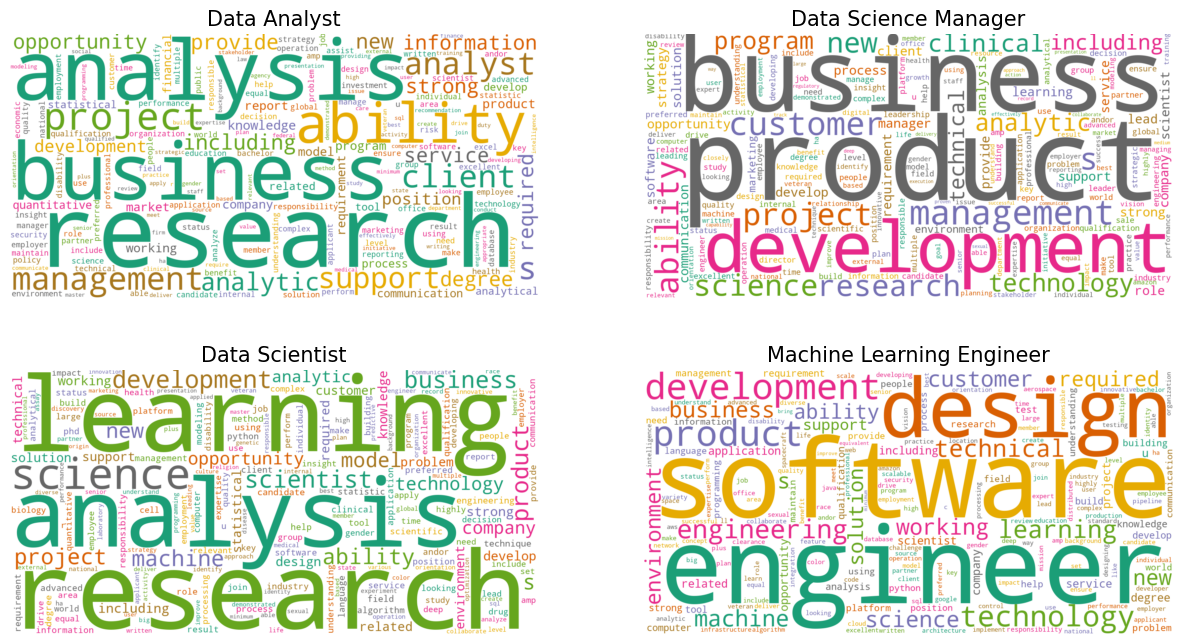

In [49]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               random_state=42, collocations=False, width=1600, height=800)

i = 0
fig = plt.figure(figsize=(15, 8))
for x in df_clean.description.index:
    wc.generate(df_clean.description[str(x)])

    i += 1
    fig.add_subplot(2, 2, i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(x), size=15)
plt.show()


Here ae my interpretation from looking at the WordCloud:
- Data Analyst will be doing **research**, **analysis** and provide insight to facilate better **business** decision.
- Data science Manager will be in charge of **developing** **product** to help **business** serve its **customer** better.
- Data Scientist will be doing **research**, implenting **machinelearning** and building **model** to come up with business solution.
- Machine Learning Engineer will **design** and **develop** **software** for business or customer.

### Years of Experience required <a id='experience'></a>

In [50]:
text = df.description.values

In [51]:
# Print out the first 5 examples of matches
limit = 0 
for t in text:
    for sentence in t.split('\n'):
        if 'experience' in sentence:
            year = re.findall("\d{1,2}\+? year", sentence)
            if len(year)==1:
                print(year[0])
                print(sentence)
                print("*"*20)
                limit +=1
    if limit >= 5:
        break

8 year
Bachelor's Degree requiredMinimum 6-8 years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to work independently and make progress on several prospects/projects at the same time.Excellent English oral, written and presentation skillsStrong leadership and management skills, as well as the ability to forge strong interpersonal relationshipsAbility to travelExcellent computer skills including use of word processing, spreadsheet, database, presentation and prospect management software operating off a PC-based system including Salesforce.
********************
5+ year
5+ years experience, with varying datasets and experience with Computational Biology/Statistics/Physics, Mathematics, Computer Science, Algorithms/Incorporate Learning, etc.
********************
10+ year
10+ years of experience in Data Architecture in a professional services environment is highly preferred
**

In [52]:
# Compile the year value found into a list
experience_req = []
limit = 0 
for t in text:
    for sentence in t.split('\n'):
        if 'experience' in sentence:
            year = re.findall("\d{1,2}\+? year", sentence)
            if len(year)==1:
                num = year[0].split(' ')
                experience_req.append(num[0])

In [53]:
# Remove the + sign after year value
for n,i in enumerate(experience_req):
    if "+" in i:
        experience_req[n] = re.sub(r'\+', '', i)
experience_req = [int(item) for item in experience_req]



In [54]:
# Remove outliers
for n,i in enumerate(experience_req):
    if i >= 20:
        experience_req.pop(n)


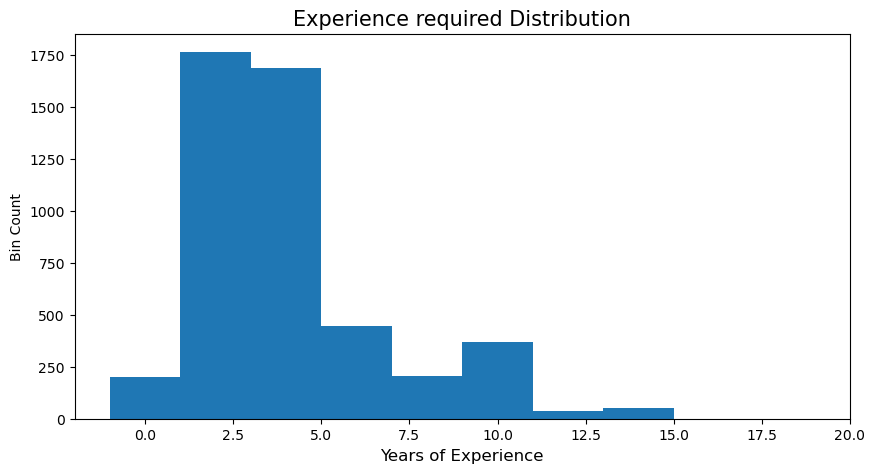

The average year os experience required is 4.67 years


In [55]:
plt.figure(figsize = (10,5))
plt.hist(experience_req,bins = list(range(0,21,2)), align='left')
plt.title('Experience required Distribution', size = 15)
plt.ylabel('Bin Count')
plt.xlabel('Years of Experience', size = 12)
plt.show()
print(f'The average year os experience required is {round(np.mean(experience_req),2)} years')

### Skill Requirement <a id='skill'></a>

In [60]:
# create a regex search function
def count_text(patt, text):
    pattern = re.compile(patt)
    count=0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [61]:
# Create a dataframe with skills name and regex pattern to search with 
skills = ['R', 'Python', 'Hadoop', 'SQL', 'Tableau', 'TensorFlow', 'Agile', 'Power BI', 'SSaS', 'Algorithm', 'Java', 'Visualization']

skill_patt = ['\WR\W+\s*', '(?i)\WPython\W?', '(?i)\WHadoop\W?', '(?i)\WSQL\W?', '(?i)\WTableau\W?',
             '(?i)\WTensorFlow\W?', '(?i)\WAgile\W?', '(?i)\WPower\s?BI\W?',
             '(?i)\WSSaS\W?', '(?i)\WAlgorithms\W?', '(?i)\WJava\W?', '(?i)\WVisualization\W?']

skill_df = pd.DataFrame(
    {"skill": skills,
     "regex_pattern": skill_patt})

In [62]:
# Iterate through the list of skill using the search function created
i = []
for x in skill_df['regex_pattern']:
    i.append(count_text(x,text))
skill_df['count'] = i
skill_df['ptg'] = round(skill_df['count']/len(text),2)
skill_df

,skill,regex_pattern,count,ptg
0,R,\WR\W+\s*,2187,0.31
1,Python,(?i)\WPython\W?,2850,0.41
2,Hadoop,(?i)\WHadoop\W?,923,0.13
3,SQL,(?i)\WSQL\W?,1743,0.25
4,Tableau,(?i)\WTableau\W?,492,0.07
5,TensorFlow,(?i)\WTensorFlow\W?,406,0.06
6,Agile,(?i)\WAgile\W?,698,0.10
7,Power BI,(?i)\WPower\s?BI\W?,66,0.01
8,SSaS,(?i)\WSSaS\W?,9,0.00
9,Algorithm,(?i)\WAlgorithms\W?,1516,0.22


C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_8812\3433281155.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


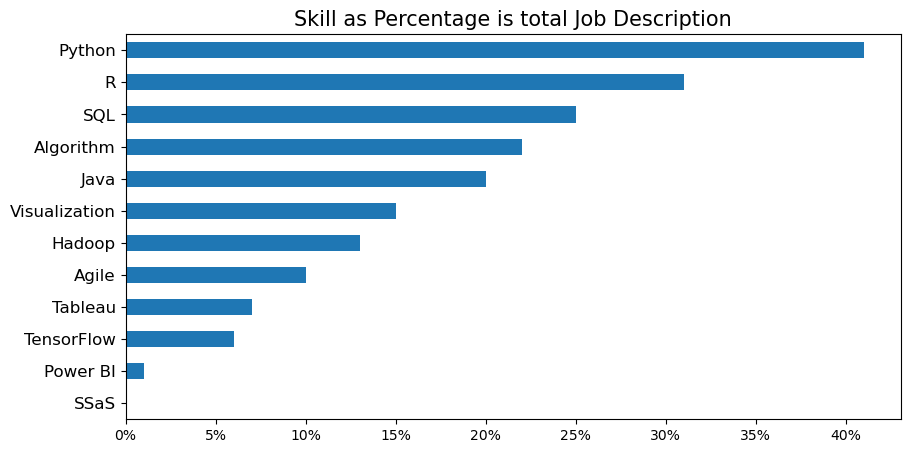

In [64]:
x = skill_df.sort_values(by = 'ptg')
ax = x['ptg'].plot(kind = 'barh', figsize = (10,5))
ax.set_title('Skill as Percentage is total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size =12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

### Degree Requirement <a id='degree'></a>

In [101]:
# Define regex pattern and search for PhD
pattern = re.compile('(?i)\WPh.?D\W?')
pattern2 = re.compile('(?i)\WDoctorate\W?')
count = 0 
for t in text :
    if pattern.search(t):
        count += 1
    elif pattern2.search(t):
        count += 1
degree = {"PhD": count}

In [102]:
# Define reges pattern and search for Masters
pattern = re.compile("(?i)\WMasters?'?s?\W")
pattern2 = re.compile('(?i)\WM.?S\W?')
count = 0 
for t in text :
    if pattern.search(t):
        count += 1
    elif pattern2.search(t):
        count += 1
degree.update({"Master":count})

In [103]:
degree = pd.DataFrame.from_dict(degree,orient='index',
                               columns=['count'])
degree['ptg'] = degree['count']/len(text)

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_8812\3017586611.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


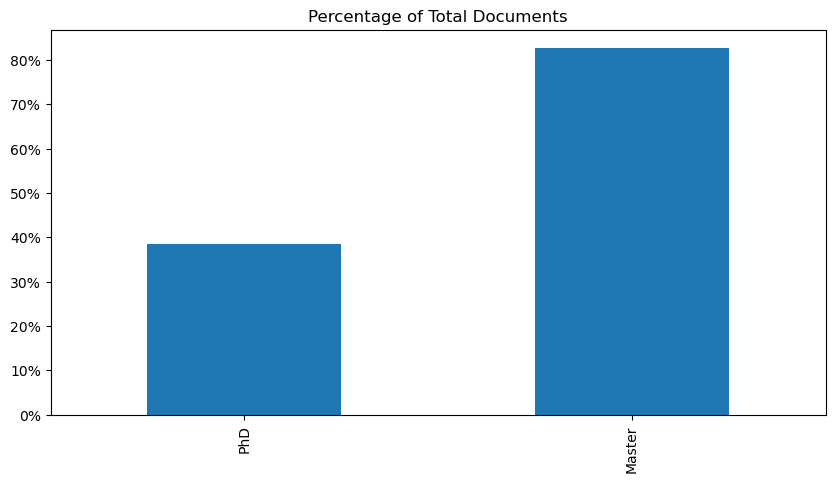

In [104]:
ax = degree['ptg'].plot(kind = "bar", figsize = (10,5))
ax.set_title('Percentage of Total Documents')
ax.set_xticklabels(degree.index)
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.show()

## Conclusion <a id='conclusion'></a>

This project provided valuable insights into what companies seek in a data science candidate. There are a few areas I wish to improve, particularly in the text analysis portion. I hope to learn more about using regular expressions to achieve better precision in my matches.

As an individual aspiring to break into data science and pursue a career as a Data Analyst, these are the key takeaways:

- **Knowledge of Python, R, and SQL**: Proficiency in these programming languages and tools is crucial.
- **Educational Qualifications**: Most job postings prefer candidates with a master's degree, making it advisable to pursue higher education for better job security.
- **Work Experience**: The average required work experience is 4-5 years. Thus, finding an entry-level analyst role or internship and working on more projects will help meet this requirement.

Thank you for reviewing my notebook. I hope you found the information useful.

Feel free to connect with me on [LinkedIn](https://www.linkedin.com/in/olisa-oluwatunbi/) or send me an email at tunbiolisa@gmail.com.